# ADR Plot for different countries affected from Covid-19

ADR (Active, Death and Recovered) cases of a country are based on 3 dataset provided by JHU namely Confirmed cases, Active Cases and Deaths of countries due to SARS Covid-19 (aka Corona virus) outbreak. Each dataset consist of countries and their datewise cases. We have calculated Active cases as:

Active = Confirmed - (Recovered + Deaths)

This script fetches the online datasets and parses through them for the required countries and plot them in a tabular fashion with 3 coulumns (subplots). Each subplot presents a country data in form of stacked bar plots.

Datasets can be found here: https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series 
[Official github link]

Note: Country name being used in code is compulsorily same as in datasets' column *'Country/Region'*

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import operator

# This line shall help produce an interactive plot within the notebook
%matplotlib notebook

### Import and Load Dataset

#### Confirmed Cases
In link provided above one can see various datasets in form of comma separated files(csv), we will import for Covid-19 Confirmed cases:
*'time_series_covid19_confirmed_global.csv'*

In [2]:
# Importing the raw csv file

Confirmed_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
Confirmed_cases.iloc[0:5,:] # Printing the first 5 rows, not using .head() explicitly

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,3778,4033,4402,4687,4963,5226,5639,6053,6402,6664
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,850,856,868,872,876,880,898,916,933,946
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,5369,5558,5723,5891,6067,6253,6442,6629,6821,7019
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,752,754,755,755,758,760,761,761,761,761
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,43,43,45,45,45,45,48,48,48,48


#### Deaths
In link provided above one can see various datasets in form of comma separated files(csv), we will import for Deaths due to Covid-19:
 *'time_series_covid19_deaths_global.csv'*
 


In [3]:
Death_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
Death_cases.iloc[0:5,:]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,109,115,120,122,127,132,136,153,168,169
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,31,31,31,31,31,31,31,31,31,31
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,488,494,502,507,515,522,529,536,542,548
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,47,48,48,48,48,49,49,49,51,51
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


#### Recovered Cases
In link provided above one can see various datasets in form of comma separated files(csv), we will import for Covid-19 Recovered cases:
 *'time_series_covid19_recovered_global.csv'*

In [4]:
Recovered_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
Recovered_cases.iloc[0:5,:]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,472,502,558,558,610,648,691,745,745,778
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,620,627,650,654,682,688,694,705,714,715
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2467,2546,2678,2841,2998,3058,3158,3271,3409,3507
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,537,545,550,550,568,576,596,604,615,617
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,11,13,13,13,13,14,14,17,17,17


### Setting Duration with Terminal Dates

All the three datasets have their starting date from index = 4, and the date is 22nd January 2020


In [5]:
# Storing Start and End Date in string format of 'DD M YYYY' (Here M is whole month)

BeginDate = datetime.strptime(Confirmed_cases.columns[4],'%m/%d/%y').strftime("%d %B %Y")
EndDate = datetime.strptime(Confirmed_cases.columns[-1],'%m/%d/%y').strftime("%d %B %Y")
print(BeginDate)
print(EndDate)

22 January 2020
17 May 2020


### Function for Parsing Data

The dataset consist of some countries which are divided into their different Provinces, therefore our first step is to add up all such data. See this example :-

In [6]:
# For example see Canada raw data
Confirmed_cases.iloc[35:46,:]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20
35,Alberta,Canada,53.9333,-116.5765,0,0,0,0,0,0,...,6098,6157,6253,6300,6345,6407,6457,6515,6587,6644
36,British Columbia,Canada,49.2827,-123.1207,0,0,0,0,0,0,...,2315,2330,2330,2353,2360,2376,2392,2407,2428,2428
37,Grand Princess,Canada,37.6489,-122.6655,0,0,0,0,0,0,...,13,13,13,13,13,13,13,13,13,13
38,Manitoba,Canada,53.7609,-98.8139,0,0,0,0,0,0,...,284,284,287,289,290,290,289,289,289,289
39,New Brunswick,Canada,46.5653,-66.4619,0,0,0,0,0,0,...,120,120,120,120,120,120,120,120,120,120
40,Newfoundland and Labrador,Canada,53.1355,-57.6604,0,0,0,0,0,0,...,261,261,261,261,261,261,261,260,260,260
41,Nova Scotia,Canada,44.6820,-63.7443,0,0,0,0,0,0,...,1008,1011,1018,1019,1020,1024,1026,1034,1037,1040
42,Ontario,Canada,51.2538,-85.3232,0,0,0,0,1,1,...,20826,21148,21469,21817,22158,22516,22865,23258,23645,23974
43,Prince Edward Island,Canada,46.5107,-63.4168,0,0,0,0,0,0,...,27,27,27,27,27,27,27,27,27,27
44,Quebec,Canada,52.9399,-73.5491,0,0,0,0,0,0,...,36161,36997,37732,38480,39235,39940,40732,41429,42192,42928


#### FetchData Function

*Params*: Country Name, Dataset (one of the 3 datasets can be passed)

*Returns*: Single row of (no. of)cases data of length equal to duration of terminal dates

The function takes care of the (no. of)cases data only and adds up all the rows corresponding to the particular country. There are countries with single row data as well, function takes care of them too.

In [7]:
# Function returns a row of cases(numerical data) related to the dataset passed as a parameter for a particular country

def FetchData(CountryName, Dataset):
       
    CountryRow = [0]*(Dataset.shape[1] - 4)
    
    for i in range(Dataset.shape[0]):
        if Dataset.iloc[i][1] == CountryName:
            for j in range(4,Dataset.shape[1]):
                CountryRow[j-4] += Dataset.iloc[i][j]
                
    return CountryRow

# --- Function Ends Here ---

### Function for creating Country DataFrame

In the next step of data processing, we need a single DataFrame for a single country to list all cases datewise.
By all cases, it means Confirmed cases, Active cases, Recovered cases and Deaths (4 categories).

*Params*: Country Name

*Returns*: Country Dataframe with 4 columns, indexed by dates

In [8]:
# Function returns a Dataframe of the country passed with index = Dates, and 4 columns each related to:-
# 1. Confirmed cases
# 2. Active cases
# 3. Recovered cases
# 4. Deaths
# Function also prints the dataframe

def CountryDataframe(CountryName):
    
    CCdata = FetchData(CountryName, Confirmed_cases)
    DCdata = FetchData(CountryName, Death_cases)
    RCdata = FetchData(CountryName, Recovered_cases)
    ACdata = list(map(operator.sub,CCdata,list(map(operator.add, DCdata, RCdata))))
    
    Dateslist = pd.date_range(BeginDate, EndDate)
    df = pd.DataFrame(list(zip(CCdata, ACdata, RCdata, DCdata)),index = Dateslist, columns = ['Confirmed', 'Active','Recovered','Deaths'])
    print(CountryName)
    print(df)
    return df

# --- Function Ends Here ---

Following is an example of the working of the function for country 'United Kingdom'

In [9]:
# For example
UKDf = CountryDataframe('United Kingdom')

United Kingdom
            Confirmed  Active  Recovered  Deaths
2020-01-22          0       0          0       0
2020-01-23          0       0          0       0
2020-01-24          0       0          0       0
2020-01-25          0       0          0       0
2020-01-26          0       0          0       0
...               ...     ...        ...     ...
2020-05-13     230985  196689       1032   33264
2020-05-14     234440  199704       1043   33693
2020-05-15     238004  202879       1047   34078
2020-05-16     241461  205857       1058   34546
2020-05-17     244995  209221       1058   34716

[117 rows x 4 columns]


### Function for plotting the graphs

*Params*: List of Countries (Number of countries should be a multiple of 3)

*Returns*: None

Function plot subplots showing each country data as a stacked bar graph (x-axis: Dates, y-axis: No. of cases). This function uses all the above mentioned functions. Final plot is also saved in the same directory as 'png' file.

In [10]:
# Function takes in a list of countries for plotting thier ADR data in multiple of 3
# Each country is plotted in one of the 3 columns of the figure
# The list is looped and then the plotting is done

def PlotCountryADRData(loc):

    noc = len(loc)
    nor = math.ceil(noc/3)
    
    fig, axes = plt.subplots(nrows = nor, ncols = 3, figsize = (20,13))
    fig.suptitle('Active, Death and Recovered Cases in selected countries as of ' + EndDate, fontsize = 18)
    plt.subplots_adjust(hspace = .4)
    
    k = 0
    for i in range(nor):
        for j in range(3):
            if k < noc:
                CountryData = CountryDataframe(loc[k])
                
                axes[i,j].bar(CountryData.index, CountryData['Active'], color = 'indigo', width = 1, edgecolor = 'white', linewidth = 0.1, label = 'Active')
                axes[i,j].bar(CountryData.index, CountryData['Deaths'], color = 'red', width = 1, edgecolor = 'white', linewidth = 0.1, label = 'Deaths', bottom = CountryData['Active'])
                axes[i,j].bar(CountryData.index, CountryData['Recovered'], color = 'green', width = 1, edgecolor = 'white', linewidth = 0.1, label = 'Recovered', bottom = CountryData['Active'] + CountryData['Deaths'])
                
                axes[i,j].set_title(loc[k], y = 1, fontsize = 13, fontweight='bold')
                
                axes[i,j].grid(axis = 'y', alpha = 0.5)
                
                myFmt = DateFormatter("%d-%b")
                axes[i,j].xaxis.set_major_formatter(myFmt)
                
                axes[i,j].spines['top'].set_visible(False)
                axes[i,j].spines['right'].set_visible(False)
                
                if k == noc-1:
                    handles, labels = axes[i,j].get_legend_handles_labels()
                
                k = k + 1
    
    fig.legend(handles, labels, bbox_to_anchor=(0.5, 0.95), loc='upper center', ncol = 3, fontsize = 13, frameon=False)
    plt.savefig('ADR.png')
    
# --- Function Ends Here ---


### Create a List of Countries

When passing the name of countries take special care of how they are spelled in the dataset

In [11]:
list_of_countries = ['India', 'China', 'Japan', 
                     'Italy', 'Iran', 'Korea, South', 
                     'France', 'Turkey', 'United Kingdom', 
                     'Russia', 'Canada', 'US',
                     'Germany', 'Brazil', 'Australia']

### Finally the Plot

The plot is interactive in nature, use scroll bars to see the whole. The plot is followed by dataframe of the countries passed. Also check image of the plot, saved in your system.

<IPython.core.display.Javascript object>


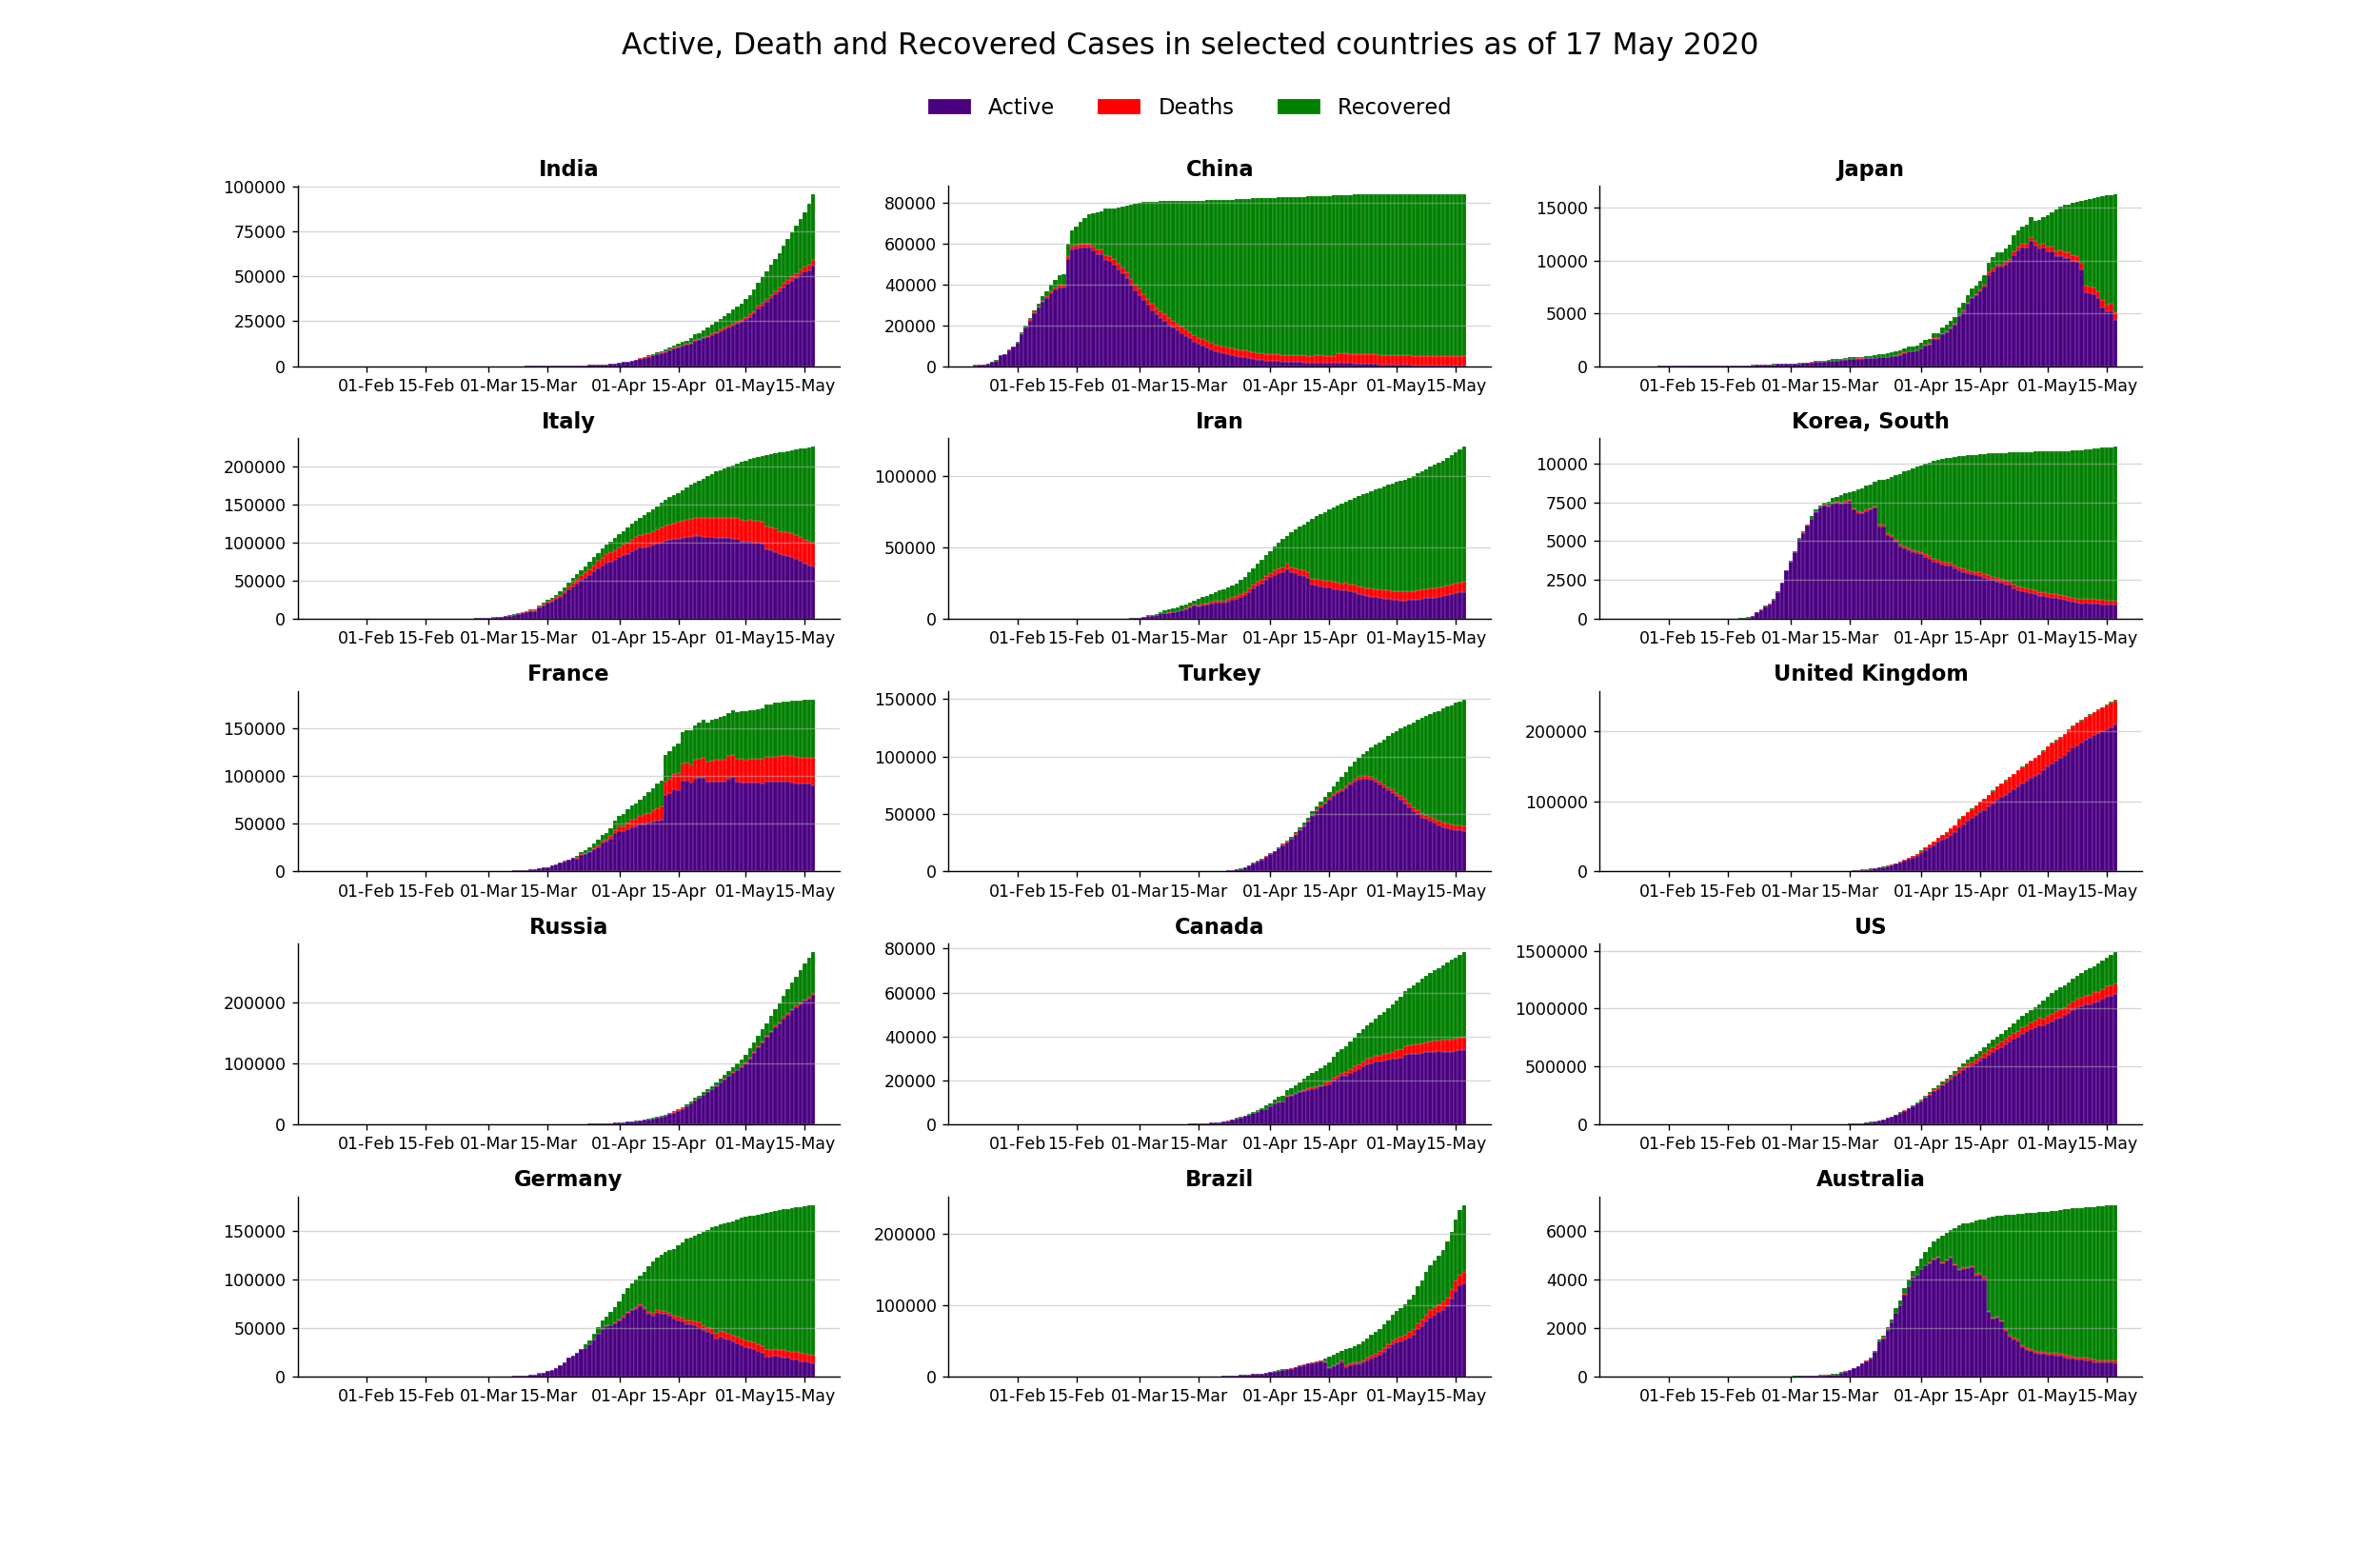

India
            Confirmed  Active  Recovered  Deaths
2020-01-22          0       0          0       0
2020-01-23          0       0          0       0
2020-01-24          0       0          0       0
2020-01-25          0       0          0       0
2020-01-26          0       0          0       0
...               ...     ...        ...     ...
2020-05-13      78055   49104      26400    2551
2020-05-14      81997   51379      27969    2649
2020-05-15      85784   52773      30258    2753
2020-05-16      90648   53553      34224    2871
2020-05-17      95698   55878      36795    3025

[117 rows x 4 columns]
China
            Confirmed  Active  Recovered  Deaths
2020-01-22        548     503         28      17
2020-01-23        643     595         30      18
2020-01-24        920     858         36      26
2020-01-25       1406    1325         39      42
2020-01-26       2075    1970         49      56
...               ...     ...        ...     ...
2020-05-13      84024     141    

Australia
            Confirmed  Active  Recovered  Deaths
2020-01-22          0       0          0       0
2020-01-23          0       0          0       0
2020-01-24          0       0          0       0
2020-01-25          0       0          0       0
2020-01-26          4       4          0       0
...               ...     ...        ...     ...
2020-05-13       6989     594       6297      98
2020-05-14       7019     587       6334      98
2020-05-15       7035     578       6359      98
2020-05-16       7044     582       6364      98
2020-05-17       7054     563       6392      99

[117 rows x 4 columns]


In [12]:
PlotCountryADRData(list_of_countries)